In [1]:
# Importation de la librairie pandas pour pouvoir charger les données
import pandas as pd

In [2]:
# Equivalent à importer numpy et matplotlib
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Charge les données winequality-white du fichier csv donc les colonnes sont séparés par les point-virgules
data = pd.read_csv('winequality-white.csv', sep =';')

In [23]:
# Affiche l'en-tète des éléments du dataset
print(data.columns)
print(data.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3        

In [43]:
# Affiche les valeurs de la matrices en élimininant la dernière colonne qui correspond à la quality
X = data[data.columns[:-1]].values
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [37]:
data.groupby(['quality']).size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [41]:
# Affiche le tableau de valeur de la colonne quality
y = data['quality'].values
y

array([6, 6, 6, ..., 6, 7, 6])

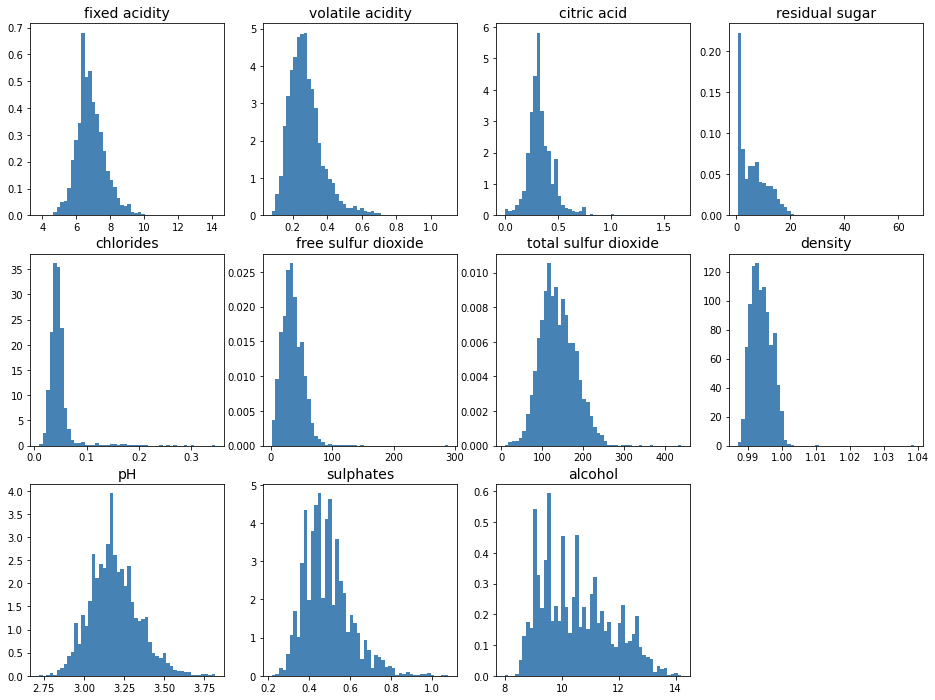

In [28]:
# Affiche la distribution des différents features de notre dataset excepté le feature quality
fig = plt.figure(figsize=(16, 12)) # Définir une instance de figure
for feat_idx in range(X.shape[1]): # Parcoure les 11 features de notre dataset
    ax = fig.add_subplot(3,4, (feat_idx+1)) # Représente l'espace où chaque figure sera représenté
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

# On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, 
# “sulphates” varie de 0 à 1 tandis que “total sulfur dioxide” varie de 0 à 440

In [31]:
# transformation du problème en un problème de classification :
# il s’agira de séparer les bons vins des vins médiocres ie si quality < 0 mauvais vins(valeur quality = 0)
# et sinon bon vin
import numpy as np
y_class = np.where(y<6, 0, 1)
y_class

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# Sépations des données en un jeu d’entraînement et en un jeu de test. Le jeu de test contiendra 30% des données
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)

In [33]:
# standardisation des données d’entraînement et appliquer la même transformation aux données de test
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

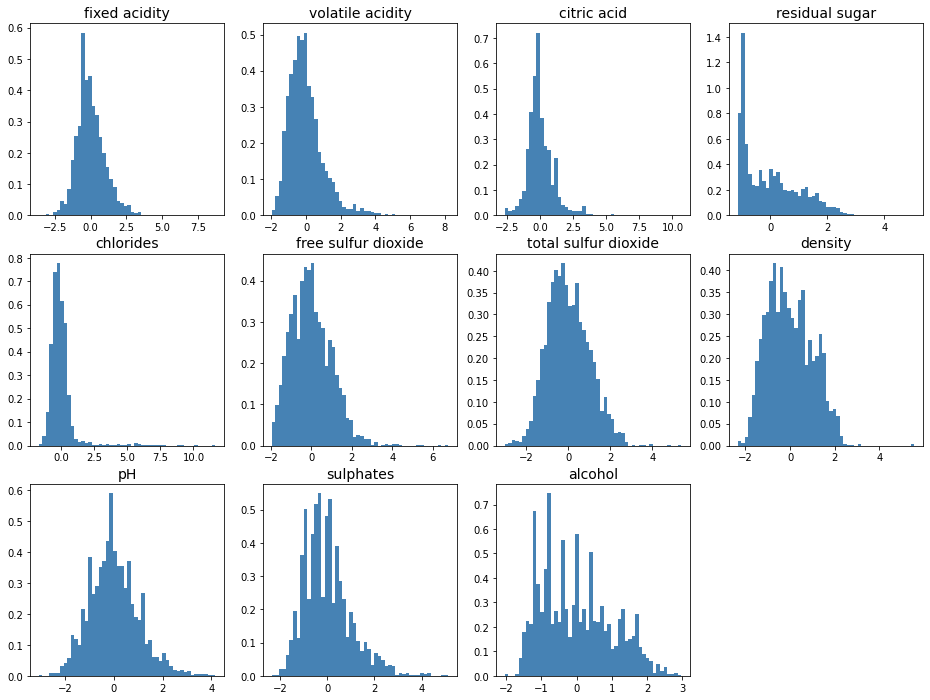

In [34]:
# Après standardisation, on remarque que les valeurs des features sont comprises entre -2 et 6
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)


In [35]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 7}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}


In [36]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.757


In [45]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
# Affiche le dataset sauf le feature quality
X1 = data[data.columns[:-1]]
X1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [50]:
# Etiquettes correspondantes (sous-types moléculaires)
y1 = data['quality']
print('y', y1.shape)

y (4898,)


In [53]:
# Créer une validation croisée stratifiée

from sklearn.model_selection import StratifiedKFold

random_state = 0
cross_validation = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)

for train_index, test_index in cross_validation.split(X, y_class):
    X_train1 = X1.iloc[train_index]
    X_test1 = X1.iloc[test_index]
    print('Train', X_train1.shape, 'Test', X_test1.shape)

Train (3918, 11) Test (980, 11)
Train (3918, 11) Test (980, 11)
Train (3918, 11) Test (980, 11)
Train (3919, 11) Test (979, 11)
Train (3919, 11) Test (979, 11)


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf1 = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

accuracy = pd.Series(dtype=float)

iteration = 0
for train_index, test_index in cross_validation.split(X, y_class):
    
    iteration += 1 # short version of "iteration = iteration + 1"
    
    # Train dataset
    X_train1 = X1.iloc[train_index]
    y_train1 = y1.iloc[train_index]
    
    
    # Test dataset
    X_test1 = X1.iloc[test_index]
    y_test1 = y1.iloc[test_index]
    
    # Standardisation des données d'entrainement
    std_scale1 = preprocessing.StandardScaler().fit(X_train1)
    X_train_std1 = std_scale1.transform(X_train1)
    X_test_std1 = std_scale1.transform(X_test1)
    
    # Train ML classifier
    clf1.fit(X_train_std1, y_train1)
    
    # Prediction
    y_pred_test1 = clf1.predict(X_test_std1)
    
    # Accuracy
    accuracy_test = metrics.accuracy_score(y_test1, y_pred_test1) 
    accuracy.loc[iteration] = accuracy_test
    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(clf1.best_params_)
    # Afficher les performances correspondantes
    print("Résultats de la validation croisée :")
    for mean, std, params in zip(
            clf.cv_results_['mean_test_score'], # score moyen
            clf.cv_results_['std_test_score'],  # écart-type du score
            clf.cv_results_['params']           # valeur de l'hyperparamètre
        ):

        print("{} = {:.3f} (+/-{:.03f}) for {}".format(
            score,
            mean,
            std*2,
            params
        ) )
    

    
    # Display
    print('Iteration', iteration, 'Accuracy =', '{:.8f}'.format(accuracy_test))

print('Mean accuracy', '{:.3f}'.format(accuracy.mean()))

/home/ismael/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}
Iteration 1 Accuracy = 0.52244898
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 11}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}
Iteration 2 Accura

/home/ismael/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}
Iteration 3 Accuracy = 0.55918367


/home/ismael/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}
Iteration 4 Accuracy = 0.56281920
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
accuracy = 0.754 (+/-0.042) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.034) for {'n_neighbors': 5}
accuracy = 0.766 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.761 (+/-0.015) for {'n_neighbors': 9}
accuracy = 0.763 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.765 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.765 (+/-0.010) for {'n_neighbors': 15}
Iteration 5 Accura

In [60]:
# Utilisation de Pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

pipeline = Pipeline([('scaler', scaler), ('classifier', clf1)])

accuracy = cross_val_score(pipeline, X, y_class, cv=cross_validation)
print(accuracy)
print('Mean test accuracy', '{:.3f}'.format(accuracy.mean()))

[0.74285714 0.75408163 0.79183673 0.76302349 0.7752809 ]
Mean test accuracy 0.765
